In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv('/content/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [31]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [32]:
# Define features for clustering
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                    'OperatingSystems', 'Browser', 'Region', 'TrafficType']

In [33]:
categorical_features = ['Month', 'VisitorType', 'Weekend', 'Revenue']

In [34]:
# Create a pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [35]:
# Create a pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [36]:
# Combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
# Apply the preprocessing pipeline
df_transformed = pd.DataFrame(preprocessor.fit_transform(df))

In [38]:
# K-means clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transformed)
    inertia.append(kmeans.inertia_)

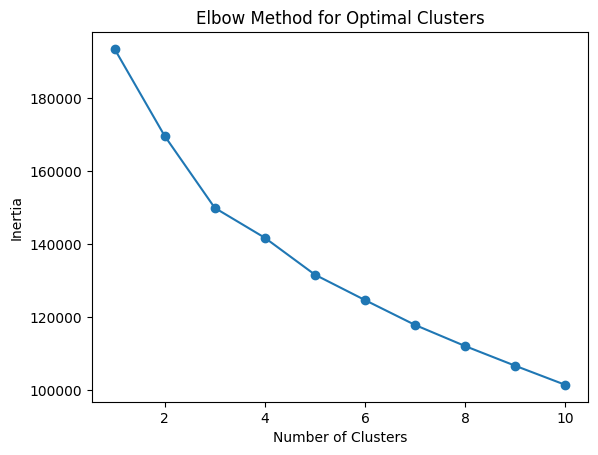

In [39]:
# Elbow method to find the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [40]:
# Choose the optimal number of clusters based on the elbow plot
optimal_clusters = 3

In [41]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_transformed)

In [42]:
# Evaluate quality of K-means clusters
silhouette_avg = silhouette_score(df_transformed, kmeans.labels_)
print(f"Silhouette Score for K-means: {silhouette_avg}")

Silhouette Score for K-means: 0.2729790316331024


In [43]:
# Hierarchical clustering
linkage_matrix = linkage(df_transformed, method='ward')

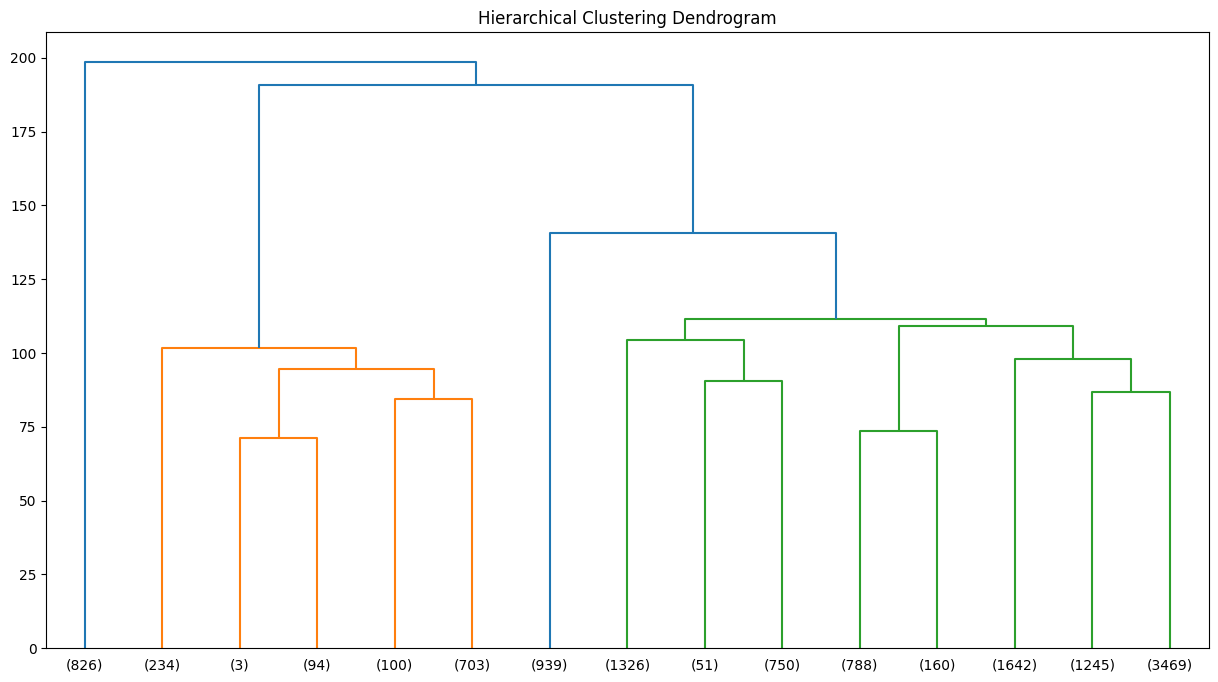

In [50]:
plt.figure(figsize=(15, 8))

# Plot the dendrogram
dendrogram(linkage_matrix, truncate_mode='lastp', p=15, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [45]:
# Cut the dendrogram to get clusters
from scipy.cluster.hierarchy import fcluster
hierarchical_clusters = fcluster(linkage_matrix, t=optimal_clusters, criterion='maxclust')

In [46]:
# Add hierarchical clusters to the original dataframe
df['Hierarchical_Cluster'] = hierarchical_clusters

In [47]:
# Evaluate quality of hierarchical clusters
silhouette_avg_hierarchical = silhouette_score(df_transformed, hierarchical_clusters)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical}")

Silhouette Score for Hierarchical Clustering: 0.28488891497963104


In [49]:
# Compare K-means and Hierarchical clusters
compare_clusters = pd.DataFrame({
    'KMeans_Cluster': df['KMeans_Cluster'],
    'Hierarchical_Cluster': df['Hierarchical_Cluster']
})
print(compare_clusters.head())

   KMeans_Cluster  Hierarchical_Cluster
0               0                     1
1               1                     3
2               0                     3
3               0                     3
4               1                     3
